### MATH5845 Assignment 2

Di Mao z5197402 

Answer: After 3973 conjugate gradient iterations, the desired accuracy has been achieved.

  0%|          | 0/10000 [00:00<?, ?it/s]


The solution converged after 3973 iterations.


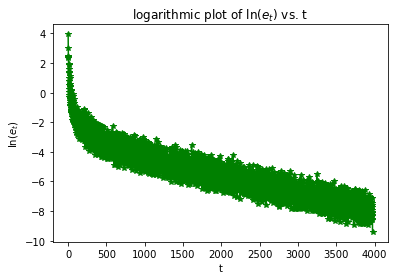

In [1]:
import math
import numpy as np
from numpy import linalg as LA
from scipy.fft import fft
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm


# Circulant Embedding Method
def cirt(x):
    # generate t series
    t = np.arange(0,n,1)
    # construct the first row of Toeplitz A through the autocovariance function
    g_1 = np.array([np.exp(-10*t/n)*np.cos(-10*math.pi*t/n)])
    k = np.arange(n-1,0,-1)
    g_2 = np.array([np.exp(-10*k/n)*np.cos(-10*math.pi*k/n)])
    g_2 = np.append(0,g_2)
    g_2 = np.array([g_2])
    gamma = np.hstack((g_1,g_2))        
    # initial x
    zero = np.zeros([1, n])
    x_f = np.hstack((x.T, zero))
    z = fft(np.conjugate(x_f))/(2*n)    # using FFT algorithm
    lamb = fft(np.conjugate(gamma))
    z = np.multiply(z, lamb)    # Hadamard product
    z = fft(np.conjugate(z)).real
    return z[:n,:n].reshape(n,1)


# Conjugate Gradient Descent Method
def conjgrad(n, x, b, tolerance):
    max_it = 10000    # assuming convergence iteration number < 10000
    pbar = tqdm(total=max_it)
    pbar.set_description("iter / max_it");

    beta = 0
    d = np.array([0 for i in np.arange(0,n,1)]).reshape(n,1)
    r = b - cirt(x)    
    rho = LA.norm(r, ord=2)
    rho_square = rho**2
    
    errors = []

    it = 0    # iteration counter
    error = LA.norm(r, ord=2)
    while (error > tolerance):
        if it > max_it:
            print('\nSolution did not converged within the maximum'
                  ' number of iterations'
                  f'\nLast l2_diff was: {error:.4e}')
            break
    
        d = r + beta*d
        Ad = cirt(d)    # column vector
        dAd = np.dot(d.T, Ad)
        alpha = rho_square/dAd
        x = x + alpha*d
        r = r - alpha*Ad
        beta = (LA.norm(r, ord=2))**2/rho_square
        rho_square = beta*rho_square
        rho = math.sqrt(rho_square)
        error = LA.norm((cirt(x)-b), ord=2)
        errors.append(error)
        #print(it, ": ", error)
        it += 1
        
        pbar.update(1)
        
    else:
        print(f'\nThe solution converged after {it} iterations.')
        out_array = np.log(np.array(errors))
        it_end = len(errors)
    
    del(pbar)
    
    return out_array, it_end


if __name__=="__main__":
    # Initial guess x; vector b; tolerance e
    n = 2**15
    e = 1e-4

    x = np.array([0 for i in np.arange(0,n,1)]).reshape(n,1)
    b = np.array([1 for i in np.arange(0,n,1)]).reshape(n,1)


    # Plot 
    out_array, it_end = conjgrad(n, x, b, e)
    t = np.arange(it_end)

    plt.plot(t, out_array, "g*-")           
    plt.title(r"logarithmic plot of $\ln(e_t)$ vs. t")
    plt.xlabel("t")
    plt.ylabel(r'$\ln(e_t)$')
    plt.show()